# Digital Image processing

## Example 1: cat in greyscale

In [18]:
img = Image.open("images/cat1.jpg").convert("L")
# img_resized = img.resize((8, 8))
img_array = np.array(img)
print(img_array)

[[243 243 244 ... 200 203 202]
 [244 243 244 ... 204 204 202]
 [244 244 244 ... 204 204 203]
 ...
 [ 64  93  90 ... 180 187 183]
 [ 87  77  78 ... 188 185 185]
 [ 84  87  85 ... 186 193 190]]


Image size: 4x4
[[195 151 122 193]
 [163 113  73 201]
 [141 113  54 154]
 [146 103  43 129]]


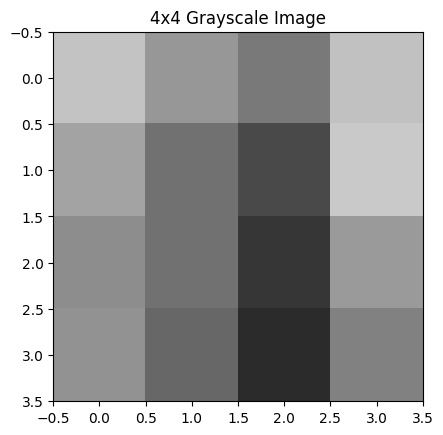

Image size: 8x8
[[226 170 206 195 195 122 175 215]
 [216 176 136  87  84  87 198 213]
 [153 170 155  72  57  76 211 210]
 [126 183 160  83  66  79 200 211]
 [117 160 117  89  34  56 153 212]
 [113 150 148  87  43  72  83 187]
 [163 161 166  75  45  57 107 182]
 [122 126 108  61  34  37  97 166]]


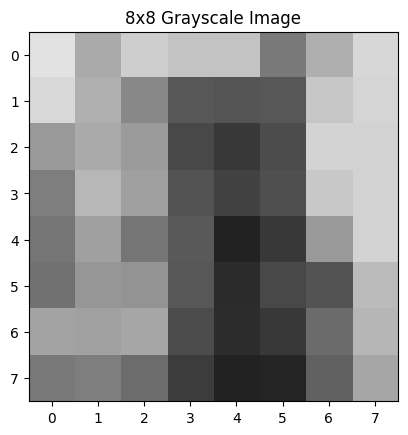

Image size: 10x10
[[236 167 196 221 204 212 164 110 210 209]
 [240 183 164 135 116 118  93 125 220 209]
 [182 173 170 104  55  54  56 142 223 207]
 [135 164 182 147  73  70  54 156 221 207]
 [110 183 175 143  71  67  66 130 219 207]
 [109 157 138 114  79  31  47  93 198 211]
 [114 136 154 130  82  36  59  67 120 207]
 [129 142 169 152  60  47  80  71 113 190]
 [173 165 159 148  66  40  43  46 163 175]
 [109 113 116  83  50  34  42  48 125 163]]


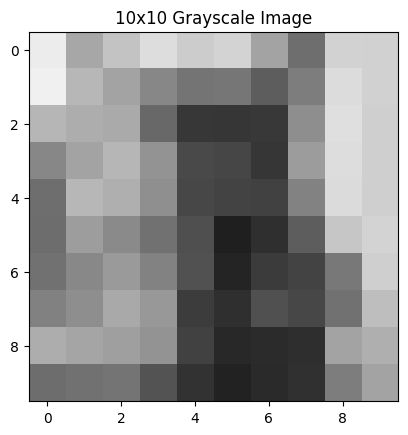

Image size: 40x40
[[244 244 246 ... 209 206 204]
 [244 244 246 ... 209 206 204]
 [244 244 245 ... 210 206 204]
 ...
 [109 134 118 ... 174 154 129]
 [ 92 108  94 ... 175 152 119]
 [ 70  76  75 ... 174 140 112]]


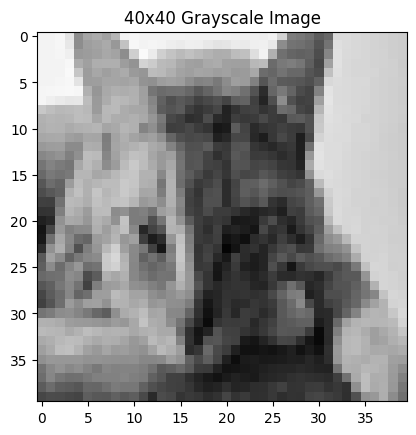

Image size: 100x100
[[244 244 244 ... 206 204 202]
 [244 244 244 ... 206 204 202]
 [244 244 244 ... 206 205 203]
 ...
 [ 76  81  88 ... 116 107 119]
 [ 73  73  74 ... 101 105 123]
 [ 67  58  56 ... 100 112 139]]


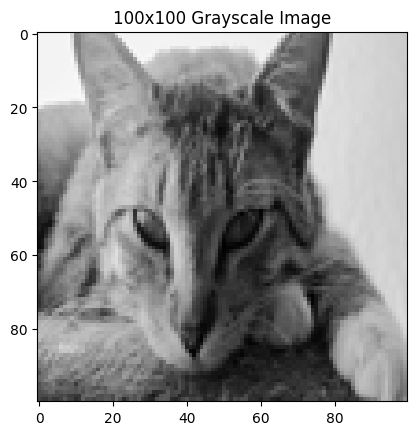

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open("images/cat1.jpg").convert("L")

sizes = [4,8,10, 40, 100]
for size in sizes:
    img_resized = img.resize((size, size))
    img_array = np.array(img_resized)
    print(f"Image size: {size}x{size}")
    print(img_array)
    plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
    plt.title(f"{size}x{size} Grayscale Image")
    
    plt.savefig(f"images/cat1_{size}.png")
    plt.show()

## Example 2: Linear transformations using matrix-vector multiplication

In [22]:
import numpy as np
from PIL import Image

img = Image.open('images/cat1.jpg').convert('RGB')
arr = np.asarray(img).astype(np.float32)

print(arr)
M = np.array([
    [-1,  0,  0],
    [ 0, -1,  0],
    [ 0,  0, -1]
], dtype=np.float32)
print("inversion matrix")
print(M)

b = np.array([255, 255, 255])

# Reshape image into a 2D matrix (N_pixels x 3)
h, w, c = arr.shape
flat = arr.reshape(-1, 3)

# Apply the linear transformation
inverted_flat = flat @ M.T + b

# Clip and reshape back to image
inverted = np.clip(inverted_flat, 0, 255).reshape(h, w, 3).astype(np.uint8)

Image.fromarray(inverted).save('inverted.jpg')

[[[243. 243. 243.]
  [243. 243. 243.]
  [244. 244. 244.]
  ...
  [208. 198. 189.]
  [211. 201. 192.]
  [210. 200. 191.]]

 [[244. 244. 244.]
  [243. 243. 243.]
  [244. 244. 244.]
  ...
  [212. 202. 193.]
  [212. 202. 193.]
  [210. 200. 191.]]

 [[244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]
  ...
  [212. 202. 193.]
  [212. 202. 193.]
  [211. 201. 192.]]

 ...

 [[102.  52.  29.]
  [131.  81.  58.]
  [128.  78.  55.]
  ...
  [200. 177. 145.]
  [205. 184. 155.]
  [201. 180. 149.]]

 [[125.  75.  52.]
  [116.  64.  42.]
  [117.  65.  43.]
  ...
  [205. 185. 158.]
  [202. 183. 153.]
  [202. 183. 153.]]

 [[123.  71.  49.]
  [126.  74.  52.]
  [124.  72.  50.]
  ...
  [200. 185. 154.]
  [208. 190. 166.]
  [208. 187. 160.]]]
inversion matrix
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]


## Example 3: New filter

In [3]:
import numpy as np
from PIL import Image

img = Image.open('images/cat1.jpg').convert('RGB')
arr1 = np.asarray(img).astype(np.float32)

M_new = np.array([
[0.393, 0.769, 0.189],
    [0.131, 0.686, 0.567],
    [0.900, 0.168, 0.349]
])


# Reshape image into a 2D matrix (N_pixels x 3)
h, w, c = arr1.shape
flat2 = arr1.reshape(-1, 3)

# Apply the linear transformation
new_filter_flat = flat2 @ M_new.T 

# Clip and reshape back to image
new_filter = np.clip(new_filter_flat, 0, 255).reshape(h, w, 3).astype(np.uint8)

Image.fromarray(new_filter).save('newfilter2.jpg')